#Загрузка датасета

In [ ]:
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


#Описательные статистики

##Формирование выборок по классам

In [ ]:
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']

print('Выборки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборки имеют одинаковую длинну:  True


##Описательные статистики по дальности поездок для класса Economy

In [ ]:
df_1.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


##Описательные статистики по дальности поездок для класса Comfort

In [ ]:
df_1.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


#Распределение задействованных в гипотезе данных

<ipython-input-6-daf8a2a288c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['distance_km'], 50)
<ipython-input-6-daf8a2a288c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['distance_km'], 50)


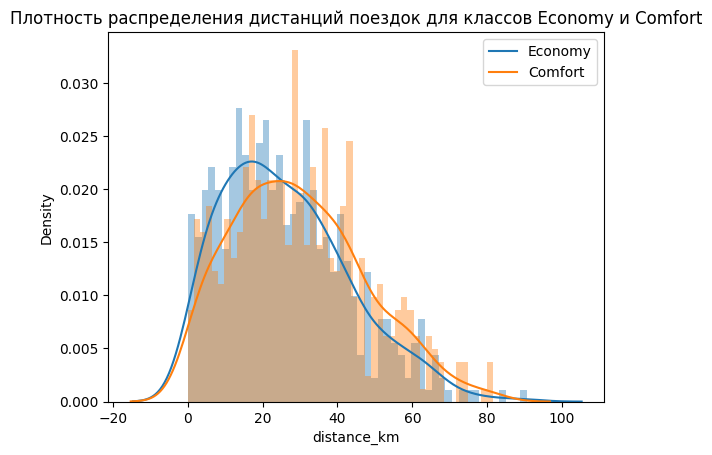

In [ ]:
sns.distplot(df_1['distance_km'], 50)
sns.distplot(df_2['distance_km'], 50)
plt.title('Плотность распределения дистанций поездок для классов Economy и Comfort')
plt.legend(['Economy', 'Comfort'])
plt.show()

#Проверка гипотезы соответствующим статистическим критерием

*Гипотеза: "На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе"*

H0 - распределение плотности поездок по классам НЕ отличается\
H1 - распределение плотности поездок по классам отличается



In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05                          # Уровень значимости

##Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


Распределение дистанции поездок по классам статистически значимо отличается

#Выводы

Гипотеза "На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе" подтверждена.\
При проведении Т-теста мы видим что выборки по признаку дистанции поездок для классов Economy и Comfort статистически значимо отличаются.\
Значения описательных статистик указывают на то, что для класса Comfort данные показатели значимо превышают значения показателей для класса Economy, то есть при выборе класса Comfort пользователи чаще совершают поездки на более длинные дистанции.\
Тот же вывод мы можем сделать при изучении графиков распределения плотности поездок по классам. Для класса Comfort график смещен вправо.